<a href="https://colab.research.google.com/github/Den4ik18/EMSE/blob/master/Ohorodnik_Denys_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ініціалізація датасету

In [5]:
# підключимо бібліотеку pandas для обробки даних (вона вже встановлена в Colab)
import pandas as pd

# зазначимо url звідки ми візьмемо дані
url = "https://raw.githubusercontent.com/vovachuck/EMPI/master/Video_Games_Sales_as_at_22_Dec_2016.csv"

# створимо pandas Dataframe з csv-файлу, який ми отримаємо по вищезазначеному url
# Dataframe надасть нам необхідні можливості для обробки даних
df = pd.read_csv(url)

# конвертуємо колонку "Global_Sales" у числові значення.
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')  
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce') 
# відобразимо перші 5 записів у датафреймі
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# Кореляція та p-рівень значимості

In [6]:
# Приклад обчислення коефіцієнта кореляції Пірсона та p-рівня значимості за допомогою scipy.stats
import pandas as pd 
from scipy import stats

#Заміна всім NaN на 0.0
df['Global_Sales'].fillna(0.0,inplace=True)
df['User_Score'].fillna(0.0,inplace=True)


ddf = pd.DataFrame(df, columns = ['Global_Sales','User_Score'])
ddf.fillna(0,inplace = True)
ddf.head()
pearson_coef, p_value = stats.pearsonr(ddf['Global_Sales'], ddf['User_Score'])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) 
#Дане p-значення говорить там про те що нульова гіпотеза відхиляється.
#Чим менше p-рівень, тим більш значущою називається тестова статистика. 
#Чим менше p-рівень, тим сильніше підстави відкинути нульову гіпотезу.
#Адже p-значення більше рівня значимості 


Pearson Correlation Coefficient:  0.13632138661178056 and a P-value of: 3.6359968200444376e-70


In [7]:
#Перевірка чи вірно попередній метод рахує Correlation Coefficient
try:
    from itertools import imap
except ImportError:
    imap=map


def pearsonr(x, y):

  n = len(x)
  sum_x = float(sum(x))
  sum_y = float(sum(y))
  sum_x_sq = sum(map(lambda x: pow(x, 2), x))
  sum_y_sq = sum(map(lambda x: pow(x, 2), y))
  psum = sum(imap(lambda x, y: x * y, x, y))
  num = psum - (sum_x * sum_y/n)
  den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
  if den == 0: return 0
  return num / den
pearsonr(df['User_Score'].tolist(), df['Global_Sales'].tolist())

0.13632138661174817

# Регресія

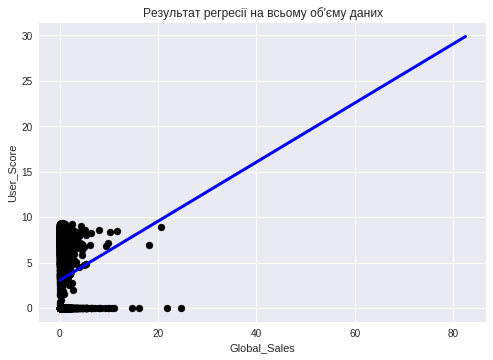

In [8]:
import numpy as np
import random
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

#Заміна NaN на 0.0
df['Global_Sales'].fillna(0.0, inplace=True)
df['User_Score'].fillna(0.0, inplace=True)
x = df['Global_Sales'].values
y = df['User_Score'].values

length = int(len(x)*20/100)

X = x.reshape(df['Global_Sales'].shape[0], 1)
Y = y.reshape(df['User_Score'].shape[0], 1)
X_train = X[:3000]
X_test = X[np.random.choice(X.shape[0], length, replace=False), :]
Y_train = Y[:3000]
Y_test = Y[np.random.choice(Y.shape[0], length, replace=False), :]


regr = linear_model.LinearRegression()
regr.fit(X, Y)

plt.title('Результат регресії на всьому об\'єму даних')
plt.xlabel('Global_Sales')
plt.ylabel('User_Score')

plt.scatter(X_test, Y_test,  color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

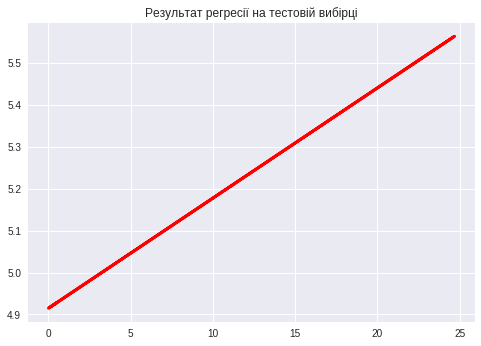

In [10]:
# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)
 
# Plot outputs
plt.title('Результат регресії на тестовій вибірці')
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)

# Контрольні запитання
1. Опишіть заради якої мети використовують кореляцію та регресію. Які сильні сторони цих інструментів? Які "підводні камені"?

Кореляцію застосовують для того щоб досліджувати взаємозв'язок двох кількісних змінних. Регресію застосовують для того щоб досліджувати звязок між двома або більше значенями.
"Підводні камені": 
1.   Помилка кореляції: додатний або від'ємний (позитивний/негативний) взаємозв'язок між 2 змінними не обов'язоково вказує, на причинно-наслідковий зв'язок.
2.   Вплив третьої змінної на дві інші.
3.   Трохи важко підібрати 2 параметри для регресії, щоб вони максимально адекватно відображали взаємозв'язок 2х кількісних змінних.
4.   Небезпечність викидів критичних значень.